In [1]:
import os
import scipy.io
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Path to the .mat file and image directory
mat_path = 'dataset/joints.mat'
image_dir = 'dataset/hr-lspet1'


In [3]:
# Specify the path to the data folder containing the images
data_folder = "dataset"  # Replace with the actual path to your image folder

In [4]:
# Load the annotation file
#annotations = scipy.io.loadmat(r"C:\Users\Nagham\HRNet-Human-Pose-Estimation\data\hr-lspet\joints.mat")
# Load the MATLAB file
annotations = scipy.io.loadmat(os.path.join(data_folder, 'joints.mat'))
joints = annotations['joints']  # Shape will be (3, 14, N), where N is the number of images

# Check the type and shape of the joints array
print("Type of joints:", type(joints))
print("Shape of joints:", joints.shape)

Type of joints: <class 'numpy.ndarray'>
Shape of joints: (14, 3, 9428)


In [5]:
# Function to load .mat file
def load_mat(mat_path):
    data = scipy.io.loadmat(mat_path)
    return data

# Function to list all images in the directory
def list_images(image_dir):
    return [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(image_dir, f))]

# Function to create a dataframe with images and their annotations
def create_dataframe(image_dir, annotations):
    images = list_images(image_dir)
    records = []
    
    for i, image in enumerate(images):
        if i < annotations.shape[2]:  # Ensure we do not go out of bounds
            annotation = annotations[:, :, i]  # Assuming annotations is a 3D array
            record = {'image': image, 'annotations': annotation}
            records.append(record)
        else:
            print(f"No annotation found for image: {image}")

    df = pd.DataFrame(records)
    return df


# Load annotations
annotations_data = load_mat(mat_path)
joints = annotations_data['joints'] 

# Create the dataframe
df = create_dataframe(image_dir, joints)

# Display the dataframe
print(df)


            image                                        annotations
0     im00001.png  [[156, 248, 0], [82, 279, 1], [169, 234, 1], [...
1     im00002.png  [[139, 95, 1], [161, 116, 1], [165, 126, 1], [...
2     im00003.png  [[177, 228, 1], [141, 209, 1], [174, 178, 1], ...
3     im00004.png  [[145, 361, 1], [136, 279, 1], [74, 236, 1], [...
4     im00005.png  [[331, 217, 1], [255, 197, 1], [320, 148, 0], ...
...           ...                                                ...
9423  im09996.png  [[333, 199, 1], [260, 185, 1], [206, 204, 1], ...
9424  im09997.png  [[166, 154, 0], [152, 153, 1], [164, 123, 1], ...
9425  im09998.png  [[238, 219, 1], [241, 181, 1], [264, 204, 1], ...
9426  im09999.png  [[75, 113, 1], [142, 139, 1], [211, 159, 1], [...
9427  im10000.png  [[217, 101, 1], [163, 129, 1], [139, 109, 1], ...

[9428 rows x 2 columns]


In [6]:
# Assuming df is your dataframe and you have the image name
image_name = 'im04056.png'

# Get the index of the image
try:
    image_index = df.loc[df['image'] == image_name].index[0]
    print(f"The index of the image {image_name} is: {image_index}")
    
    # Access the annotations using .at or .loc
    annotations = df.at[image_index, 'annotations']
    print(f"Annotations for {image_name}: {annotations}")
except IndexError:
    print(f"Image {image_name} not found in the dataframe.")

The index of the image im04056.png is: 3816
Annotations for im04056.png: [[135 257   1]
 [153 212   1]
 [143 173   1]
 [165 169   1]
 [155 221   1]
 [111 217   1]
 [136 169   1]
 [123 140   1]
 [150 129   1]
 [191 137   1]
 [178 162   0]
 [178 181   0]
 [188 133   1]
 [199 113   1]]


In [7]:
# Function to convert annotations to tuples of (x, y) coordinates
def convert_annotations_to_tuples(annotation):
    return [(annotation[0, i], annotation[1, i]) for i in range(annotation.shape[1])]

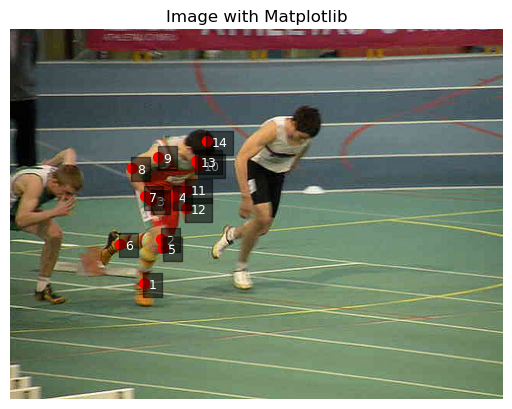

In [8]:
# Load your image
# Combine image directory with image name to get the full image path
image_path = os.path.join(image_dir, image_name)
image = cv2.imread(image_path)

# Convert the image from BGR to RGB (OpenCV loads images in BGR format)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.title("Image with Matplotlib")

# Prepare a list to store tuples of (x, y) coordinates
keypoint_tuples = []

# Loop through each keypoint and extract (x, y) coordinates
for i in range(annotations.shape[0]):
    x = annotations[i, 0]
    y = annotations[i, 1]
    # Optionally, include visibility if needed
    # visibility = keypoints[i, 2]
    
    keypoint_tuples.append((int(x), int(y)))  # Convert to int if needed


# Draw keypoints on the image with labels
for i, point in enumerate(keypoint_tuples, start=1):
    plt.scatter(point[0], point[1], s=50, c='red', marker='o')
    plt.text(point[0] + 5, point[1] + 5, str(i), fontsize=9, color='white', bbox=dict(facecolor='black', alpha=0.5))

# Hide axes
plt.axis('off')

# Show the final image with keypoints
plt.show()